In [1]:
#Importing the Necessary Libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error

import time

In [2]:
#Read the CSV file from the local directory using read_csv. 
data = pd.read_csv("insurance.csv")
#Printing few sample rows
print(data.head())

   Age  Gender   BMI  Children Smoker     Region  Expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


In [3]:
#Dimensions of the data.
print("Shape of the data:",data.shape)

Shape of the data: (1338, 7)


In [4]:
#Fetching the information about the data.
print(data.info())
#In the below observation of the data we can see there are missing parameters in all the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1338 non-null   int64  
 1   Gender    1332 non-null   object 
 2   BMI       1330 non-null   float64
 3   Children  1338 non-null   int64  
 4   Smoker    1338 non-null   object 
 5   Region    1336 non-null   object 
 6   Expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [5]:
#Removing the rows which contains the missing values.
cleaned_data = data.dropna()
print(cleaned_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1321 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1321 non-null   int64  
 1   Gender    1321 non-null   object 
 2   BMI       1321 non-null   float64
 3   Children  1321 non-null   int64  
 4   Smoker    1321 non-null   object 
 5   Region    1321 non-null   object 
 6   Expenses  1321 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 82.6+ KB
None


In [6]:
#Print the new dimensions of the data.
print("Dimensions of the after cleaning: ",cleaned_data.shape)
print(cleaned_data.dtypes)

Dimensions of the after cleaning:  (1321, 7)
Age           int64
Gender       object
BMI         float64
Children      int64
Smoker       object
Region       object
Expenses    float64
dtype: object


In [7]:
# Use the One Hot Encoding for the Region column
# Binary Encoding for Sex and Smoker Columns

encoder = OneHotEncoder(sparse_output=False)
encoder

OneHotEncoder(sparse_output=False)

In [8]:
encoded_data = encoder.fit_transform(cleaned_data[["Region"]])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["Region"]))

In [9]:
data_new = pd.concat([cleaned_data,encoded_df],axis=1)
print(data_new.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1336 entries, 0 to 1313
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1321 non-null   float64
 1   Gender            1321 non-null   object 
 2   BMI               1321 non-null   float64
 3   Children          1321 non-null   float64
 4   Smoker            1321 non-null   object 
 5   Region            1321 non-null   object 
 6   Expenses          1321 non-null   float64
 7   Region_northeast  1321 non-null   float64
 8   Region_northwest  1321 non-null   float64
 9   Region_southeast  1321 non-null   float64
 10  Region_southwest  1321 non-null   float64
dtypes: float64(8), object(3)
memory usage: 125.2+ KB
None


In [10]:
binencoder = ce.binary.BinaryEncoder(cols=['Gender','Smoker'],return_df=True)
binencoder

BinaryEncoder(cols=['Gender', 'Smoker'])

In [11]:
data_encoded = binencoder.fit_transform(data_new)
print(data_encoded.head())

    Age  Gender_0  Gender_1   BMI  Children  Smoker_0  Smoker_1     Region  \
0  19.0         0         1  27.9       0.0         0         1  southwest   
1  18.0         1         0  33.8       1.0         1         0  southeast   
2  28.0         1         0  33.0       3.0         1         0  southeast   
3  33.0         1         0  22.7       0.0         1         0  northwest   
4  32.0         1         0  28.9       0.0         1         0  northwest   

   Expenses  Region_northeast  Region_northwest  Region_southeast  \
0  16884.92               0.0               0.0               0.0   
1   1725.55               0.0               0.0               1.0   
2   4449.46               0.0               0.0               1.0   
3  21984.47               0.0               1.0               0.0   
4   3866.86               0.0               1.0               0.0   

   Region_southwest  
0               1.0  
1               0.0  
2               0.0  
3               0.0  
4     

In [12]:
#Remove the Region Column now
data_encoded = data_encoded.drop(['Region'],axis=1)
print(data_encoded.head())
data_encoded = data_encoded.dropna()

    Age  Gender_0  Gender_1   BMI  Children  Smoker_0  Smoker_1  Expenses  \
0  19.0         0         1  27.9       0.0         0         1  16884.92   
1  18.0         1         0  33.8       1.0         1         0   1725.55   
2  28.0         1         0  33.0       3.0         1         0   4449.46   
3  33.0         1         0  22.7       0.0         1         0  21984.47   
4  32.0         1         0  28.9       0.0         1         0   3866.86   

   Region_northeast  Region_northwest  Region_southeast  Region_southwest  
0               0.0               0.0               0.0               1.0  
1               0.0               0.0               1.0               0.0  
2               0.0               0.0               1.0               0.0  
3               0.0               1.0               0.0               0.0  
4               0.0               1.0               0.0               0.0  


In [13]:
#Divided the Feature and Target Variables.
X=data_encoded.drop(['Expenses'],axis=1)
y=data_encoded['Expenses']
print(X.shape,y.shape)

(1306, 11) (1306,)


In [14]:
#Normalizing the Data Using MinMaxScaler.
scaling = MinMaxScaler()
scaling

MinMaxScaler()

In [15]:
X_scaled = scaling.fit_transform(X)

In [16]:
#Splitting the Data 
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
print("The Shape of X_train is: ",X_train.shape)
print("The Shape of y_train is: ",y_train.shape)
print("The Shape of X_test is: ",X_test.shape)
print("The Shape of y_test is: ",y_test.shape)

The Shape of X_train is:  (1044, 11)
The Shape of y_train is:  (1044,)
The Shape of X_test is:  (262, 11)
The Shape of y_test is:  (262,)


In [17]:
y_train_reshaped = y_train.to_numpy().reshape(-1,1)
y_test_reshaped = y_test.to_numpy().reshape(-1,1)

In [18]:
#Gradient Descent Model Implementation.
def gradient_descent(X_train,y_train,alpha):
    X_b = np.c_[np.ones((X_train.shape[0],1)),X_train]
    m=X_train.shape[0]#Number Of DataPoints.
    n_iterations = 10000
    W = np.random.randn(X_train.shape[1]+1,1)
    loss=[]
    for iteration in range(n_iterations):
        gradients = 1/m * X_b.T.dot(X_b.dot(W) - y_train)
        W = W - alpha * gradients
        predictions = X_b.dot(W)
        loss.append(mean_squared_error(y_train, predictions))
    return W,loss

In [19]:
W,loss = gradient_descent(X_train,y_train_reshaped,0.02)
print("Coefficients and Intercepts of the Predictions: ",W)

Coefficients and Intercepts of the Predictions:  [[  3652.68709768]
 [ 12908.52534024]
 [  1697.22045281]
 [  1958.24747399]
 [ 11305.73878624]
 [  3908.3272095 ]
 [-10337.42933741]
 [ 13995.28982138]
 [  1466.75726676]
 [   990.26924049]
 [   532.92143619]
 [   666.05297953]]


In [20]:
#Gradient Descent Model Implementation with constant decay rate and exponential decay rate.
def gradient_descent_decay(X_train,y_train,alpha):
    X_b = np.c_[np.ones((X_train.shape[0],1)),X_train]
    m=X_train.shape[0]#Number Of DataPoints.
    n_iterations = 10000
    W = np.random.randn(X_train.shape[1]+1,1)
    loss_exponential_lr=[]
    decay_rate = 0.1
    for iteration in range(n_iterations):
        #alpha = np.exp(-decay_rate*iteration)
        alpha = alpha*(1/(1+decay_rate*iteration))
        gradients = 1/m * X_b.T.dot(X_b.dot(W) - y_train)
        W = W - alpha * gradients
        predictions = X_b.dot(W)
        loss_exponential_lr.append(mean_squared_error(y_train, predictions))
    return W,loss_exponential_lr

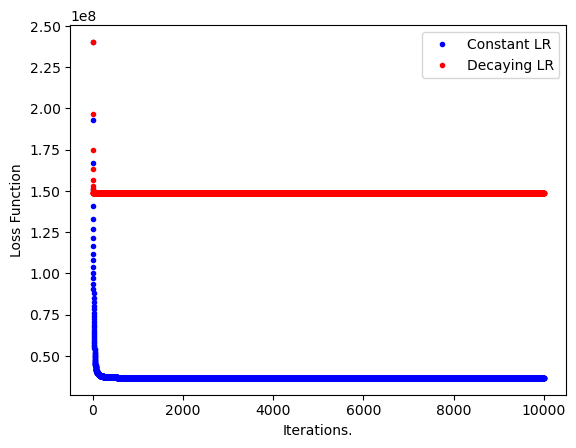

In [21]:
W,loss_elr = gradient_descent_decay(X_train,y_train_reshaped,0.1)
W,loss_clr = gradient_descent(X_train,y_train_reshaped,0.1)
n_iterations = 10000
plt.plot(range(n_iterations),loss_clr,"b.",label = "Constant LR")
plt.plot(range(n_iterations),loss_elr,"r.", label = "Decaying LR")
plt.xlabel("Iterations.")
plt.ylabel("Loss Function")
plt.legend()
plt.show()

In [22]:
#Model Evaluation.
#Predicting the data for the test dataset.
start_time = time.time()
W,loss = gradient_descent(X_train,y_train_reshaped,0.02)
end_time = time.time()
print("Computational Time: ",(end_time-start_time))
X_test_b = np.c_[np.ones((X_test.shape[0],1)),X_test]
predictions = X_test_b.dot(W)
print("Mean Squared Error is: ",mean_squared_error(y_test_reshaped,predictions))
print("Mean Absolute Error is: ",mean_absolute_error(y_test_reshaped,predictions))

Computational Time:  8.535726308822632
Mean Squared Error is:  38700670.37558508
Mean Absolute Error is:  4447.325614224069


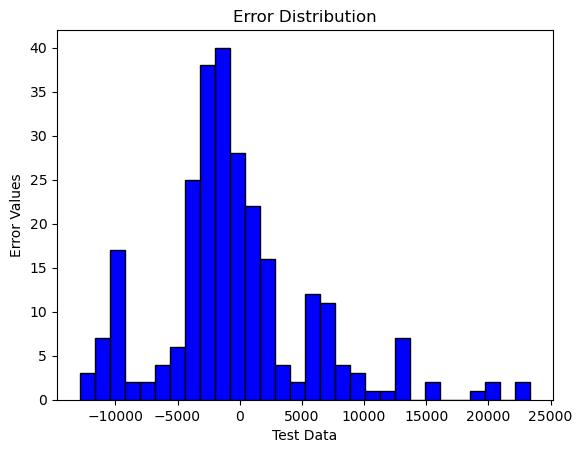

In [23]:
# Plot a histogram of the error distribution

error = (y_test_reshaped-predictions)

plt.hist(error,bins=30,color = "blue",edgecolor = "black")
plt.xlabel("Test Data")
plt.ylabel("Error Values")
plt.title("Error Distribution")
plt.show()

In [25]:
#6.Scikit-learn Implementation
start_time = time.time()
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
end_time = time.time()
print("Computational Time: ",(end_time-start_time))
y_pred = lin_reg.predict(X_test)
print(lin_reg.score(X_test,y_test))
print("Mean Squared Error: ",mean_squared_error(y_test_reshaped,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test_reshaped,y_pred))

Computational Time:  0.0059964656829833984
0.689070015091368
Mean Squared Error:  39612442.26800394
Mean Absolute Error:  4486.3157741860805


In [26]:
#7.Normal Equation Implementation:
X_train_b = np.c_[np.ones((X_train.shape[0],1)),X_train]
start_time = time.time()
W_norm = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train_reshaped)
end_time = time.time()
print("Computational Time: ",(end_time-start_time))
print("Coefficients and Intercepts are: ",W_norm)
X_test_b = np.c_[np.ones((X_test.shape[0],1)),X_test]
norm_predictions = X_test_b.dot(W_norm)
print("Mean Squared Error: ",mean_squared_error(y_test_reshaped,norm_predictions))
print("Mean Absolute Error: ",mean_absolute_error(y_test_reshaped,norm_predictions))

Computational Time:  0.001468658447265625
Coefficients and Intercepts are:  [[-3.12515575e+19]
 [-1.98319891e+05]
 [ 9.81302539e+19]
 [ 9.81302539e+19]
 [-1.43468890e+06]
 [ 1.81453878e+08]
 [-6.68786964e+19]
 [-6.68786964e+19]
 [ 1.25998889e+06]
 [ 4.82187842e+05]
 [ 9.34801395e+05]
 [ 4.35070006e+05]]
Mean Squared Error:  35642446338124.66
Mean Absolute Error:  1902250.1095038168
